# 응용하기

## 모듈

### `if __name__ = "__main__"`: 의미

In [1]:
import mod1 as m1

In [2]:
!python3 mod1.py

5
2


In [12]:
print(m1.add(3, 4))
print(m1.add(8, 4))
print(m1.sub(3, 4))
print(m1.sub(9, 3))

7
12
-1
6


In [10]:
from mod1 import add, sub

print(add(55, 134))

print(sub(55, 134))


189
-79


In [3]:
m1.__name__

'mod1'

### 클래스나 변수 등을 포함한 모듈

In [4]:
import mod2

a = mod2.Math()
print(mod2.PI)
print(a.solv(10))

3.141592
314.1592


In [5]:
from mod2 import Math, PI

a = Math()
print(PI)
print(a.solv(10))

3.141592
314.1592


### 다른 디렉터리에 있는 모듈을 불러오는 방법

In [7]:
# %%sh
# mkdir ./mymod
# mv mod2.py ./mymod/mymod2.py # mv 무브지만 이름변경도

In [8]:
import mymod2

ModuleNotFoundError: No module named 'mymod2'

In [6]:
import sys
# !pwd # /home/kys/data
# sys.path에 mymod2가 위치한 절대경로를 추가함.
# sys.path.append("/home/khs/data/mymod/")
# sys.path.pop() 위 명령어를 중복 실행 했을 떄 최신 경로부터 삭제..

In [7]:
sys.path

['/usr/lib/python312.zip',
 '/usr/lib/python3.12',
 '/usr/lib/python3.12/lib-dynload',
 '',
 '/home/khs/venv/lib/python3.12/site-packages',
 '/home/khs/data/mymod/']

In [ ]:
# PYTHONPATH 환경 변수 등 등록하여 사용할 수 있다.

## 패키지

In [9]:
# %%sh

# mkdir game 
# mkdir game/sound
# mkdir game/graphic
# mkdir game/play

In [12]:
%%sh

echo "" >> /home/khs/data/game/__init__.py
echo "" >> /home/khs/data/game/sound/__init__.py
echo "" >> /home/khs/data/game/graphic/__init__.py
echo "" >> /home/khs/data/game/play/__init__.py

In [17]:
%%sh

echo "def echo_test():\n\tprint('echo')" > /home/khs/data/game/sound/echo.py
echo "def render_test():\n\tprint('render')" > /home/khs/data/game/graphic/render.py

### 패키지 안의 함수 실행하기

In [1]:
'''1'''
# import game.sound.echo
# game.sound.echo.echo_test()

'''2'''
# import game.sound.echo as ec
# ec.echo_test()

'''3'''
# from game.sound import echo
# echo.echo_test()

'''4'''
from game.sound.echo import echo_test
echo_test()

echo


In [4]:
f = open("/home/khs/data/game/__init__.py", "w")
st = '''VERSION = 4.5

def print_version_info():
    print(f"The version of this game is {VERSION}.")

'''


f.write(st)
f.close()

In [3]:
import game

print(game.VERSION)
game.print_version_info()

4.5
The version of this game is 4.5.


### 패키지 내 모듈을 미리 import

In [1]:
st = '''from .graphic.render import render_test

VERSION = 4.6

def print_version_info():
    print(f"The version of this game is {VERSION}.")

'''
with open("/home/khs/data/game/__init__.py", "w") as f:
    
    f.write(st)

In [2]:
import game

game.render_test()

render


### 패키지 초기화

In [1]:
st = '''from .graphic.render import render_test

VERSION = 4.7

def print_version_info():
    print(f"The version of this game is {VERSION}.")

print("Initializing game ...")
'''
with open("/home/khs/data/game/__init__.py", "w") as f:
    
    f.write(st)

In [2]:
import game

Initializing game ...


In [1]:
from game.graphic.render import render_test

Initializing game ...


### all (*)

In [1]:
from game.sound import *

Initializing game ...


In [3]:
with open("/home/khs/data/game/sound/__init__.py","w") as f:
    f.write("__all__ = ['echo']")

In [2]:
echo.echo_test()

echo


### 상대경로 패키지

In [1]:
st = '''from game.sound.echo import echo_test
# from ..sound.echo import echo_test
def render_test():
    print("render")
    echo_test()
'''

with open("/home/khs/data/game/graphic/render.py", "w") as f:
    f.write(st)

In [2]:
from game.graphic.render import render_test
render_test()

Initializing game ...
render
echo


# 예외처리 *

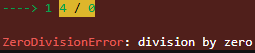

In [24]:
# except는 뒤에 나오는 구문을 생략할 수 있다.

try:
    4 / 0
except ZeroDivisionError as e:
    print(e)

division by zero


In [17]:
# try_finally.py
try:
    f = open('foo.txt', 'w')
    # 무언가를 수행한다.

    # (... 생략 ...)

finally:
    f.close()  # 중간에 오류가 발생하더라도 무조건 실행된다.
    print("파일을 열고 닫았습니다.")

파일을 열고 닫았습니다.


In [25]:
# 먼저 만나는 오류를 출력

try:
    a = [1, 2]
    print(a[3])
    4 / 0
    print("나는 멋져")

except ZeroDivisionError as e:
    print("0으로 나눌 수 없습니다.", e)
except IndexError as e:
    print("인덱싱 할 수 없습니다.", e)

인덱싱 할 수 없습니다. list index out of range


In [26]:
# 먼저 만나는 오류를 출력

try:
    a = [1, 2]
    print(a[3])
    4 / 0
    print("나는 멋져")

except (ZeroDivisionError, IndexError) as e:
    print("인덱싱 할 수 없습니다.", e)

인덱싱 할 수 없습니다. list index out of range


In [12]:
# try-else 문

try:
    age = input("나이를 입력하세요: ")

except:
    print('입력이 정확하지 않습니다.')
else:
    try:
        if age <= 18:
            print("미성년자는 출입금지 입니다.")
        else:
            print("환영합니다.")
    except:
        print("프로그램 점검요망.")

나이를 입력하세요:  19


프로그램 점검요망.


In [17]:
# 오류 회피하기

students = ['김철수', '이영희', '박민수', '최유진']

for (i, student) in enumerate(students, 1):
    try:
        with open(f"{student}_성적.txt",'r') as f:
            score = f.read()
            print(f"{student}의 성적: {score}")
    except:
        print(f"{student}의 성적 파일이 없습니다. 건너뜁니다.")
        continue

김철수의 성적 파일이 없습니다. 건너뜁니다.
이영희의 성적 파일이 없습니다. 건너뜁니다.
박민수의 성적 파일이 없습니다. 건너뜁니다.
최유진의 성적 파일이 없습니다. 건너뜁니다.


In [25]:
class Bird:
    def fly(self):
        # print("난다날어~! 나는 누구 여긴 어디~")
        raise NotImplementedError ("설정해주세요.")

In [26]:
a = Bird()
a.fly()

NotImplementedError: 설정해주세요.

In [27]:
class Eagle(Bird):
    def fly(self):
        print("난 진짜 난다!")

In [28]:
a = Eagle()
a.fly()

난 진짜 난다!


In [34]:
class MyError(Exception):
    def __str__(self):
        return "나는 바보가 아냐! 코훌쩍..."

In [35]:
def say_nick(nick):
    if nick == '바보':
        raise MyError()
    print(nick)

In [36]:
try:
    say_nick("천사")
    say_nick("바보")
except MyError as e:
    print(e)

천사
나는 바보가 아냐! 코훌쩍...


#### 되새김 문제

In [2]:
class Calculator:
    def __init__(self):
        self.value = 0

    def add(self, val):
        self.value += val

class UpgradeCalculator(Calculator):
    def minus(self, val):
        self.value -= val

cal = UpgradeCalculator()

cal.add(10)
cal.minus(7)

print(cal.value)

3


In [5]:
class Calculator:
    def __init__(self):
        self.value = 0

    def add(self, val):
        self.value += val

class MaxLimitCalculator(Calculator):
    def add(self,val):
        self.value += val
        if self.value > 100:
            self.value = 100

cal = MaxLimitCalculator()

cal.add(50)
cal.add(60)

print(cal.value)

100
